In [2]:
import sys
!{sys.executable} -m pip install kaggle  --quiet

In [3]:
import kaggle, os, pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [4]:
kaggle.api.dataset_download_files('jsphyg/weather-dataset-rattle-package','.',unzip=True)
print(os.listdir("."))

Dataset URL: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package
['.ipynb_checkpoints', 'Aussie_Weather_Predict_RandomF.ipynb', 'encoder.pkl', 'imputer.pkl', 'Random_Forest.pkl', 'Read.md', 'scaler.pkl', 'weatherAUS.csv']


In [5]:
raw_df=pd.read_csv('./weatherAus.csv')
pd.set_option('display.max_columns', None)

This dataset comprises about 10 years of daily weather observations from numerous locations across Australia.

RainTomorrow is the target variable to predict. It answers the crucial question: will it rain the next day? (Yes or No).


In [6]:
raw_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [8]:
raw_df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [9]:
raw_df['RainTomorrow'].isna()

0         False
1         False
2         False
3         False
4         False
          ...  
145455    False
145456    False
145457    False
145458    False
145459     True
Name: RainTomorrow, Length: 145460, dtype: bool

In [10]:
df=raw_df[raw_df['RainTomorrow'].notnull()].copy()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null   fl

In [12]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


*EDA*

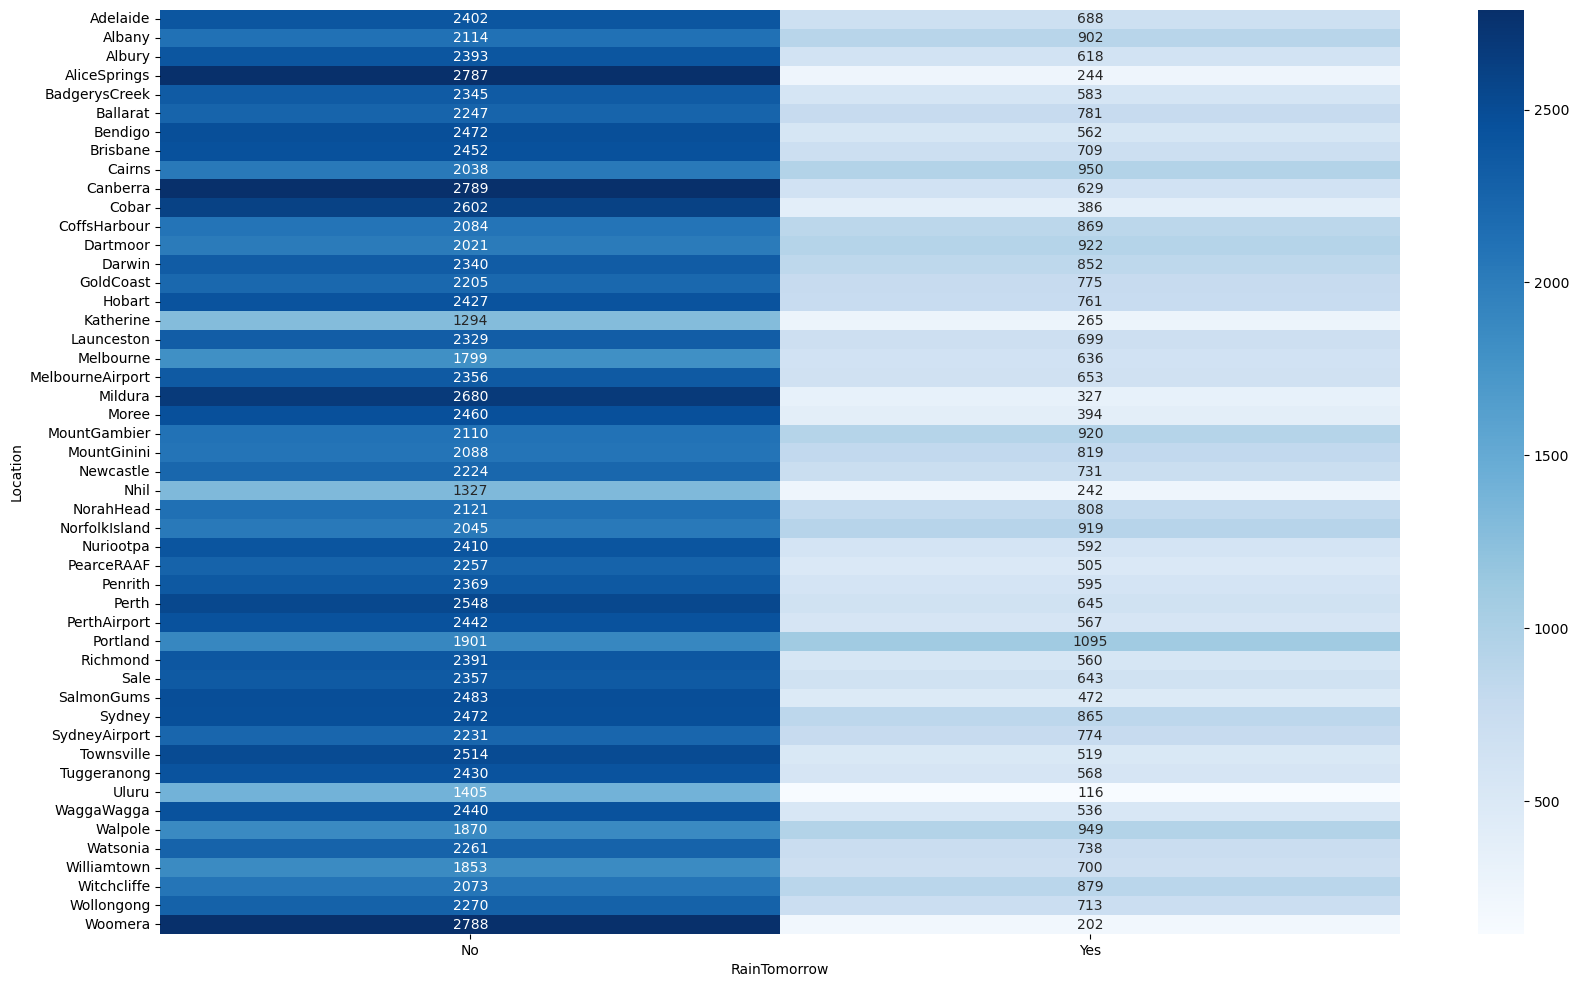

In [13]:
plt.figure(figsize=(20, 12))
ctab = pd.crosstab(df["Location"], df["RainTomorrow"])
sns.heatmap(ctab, annot=True, fmt="d", cmap="Blues")
plt.show()

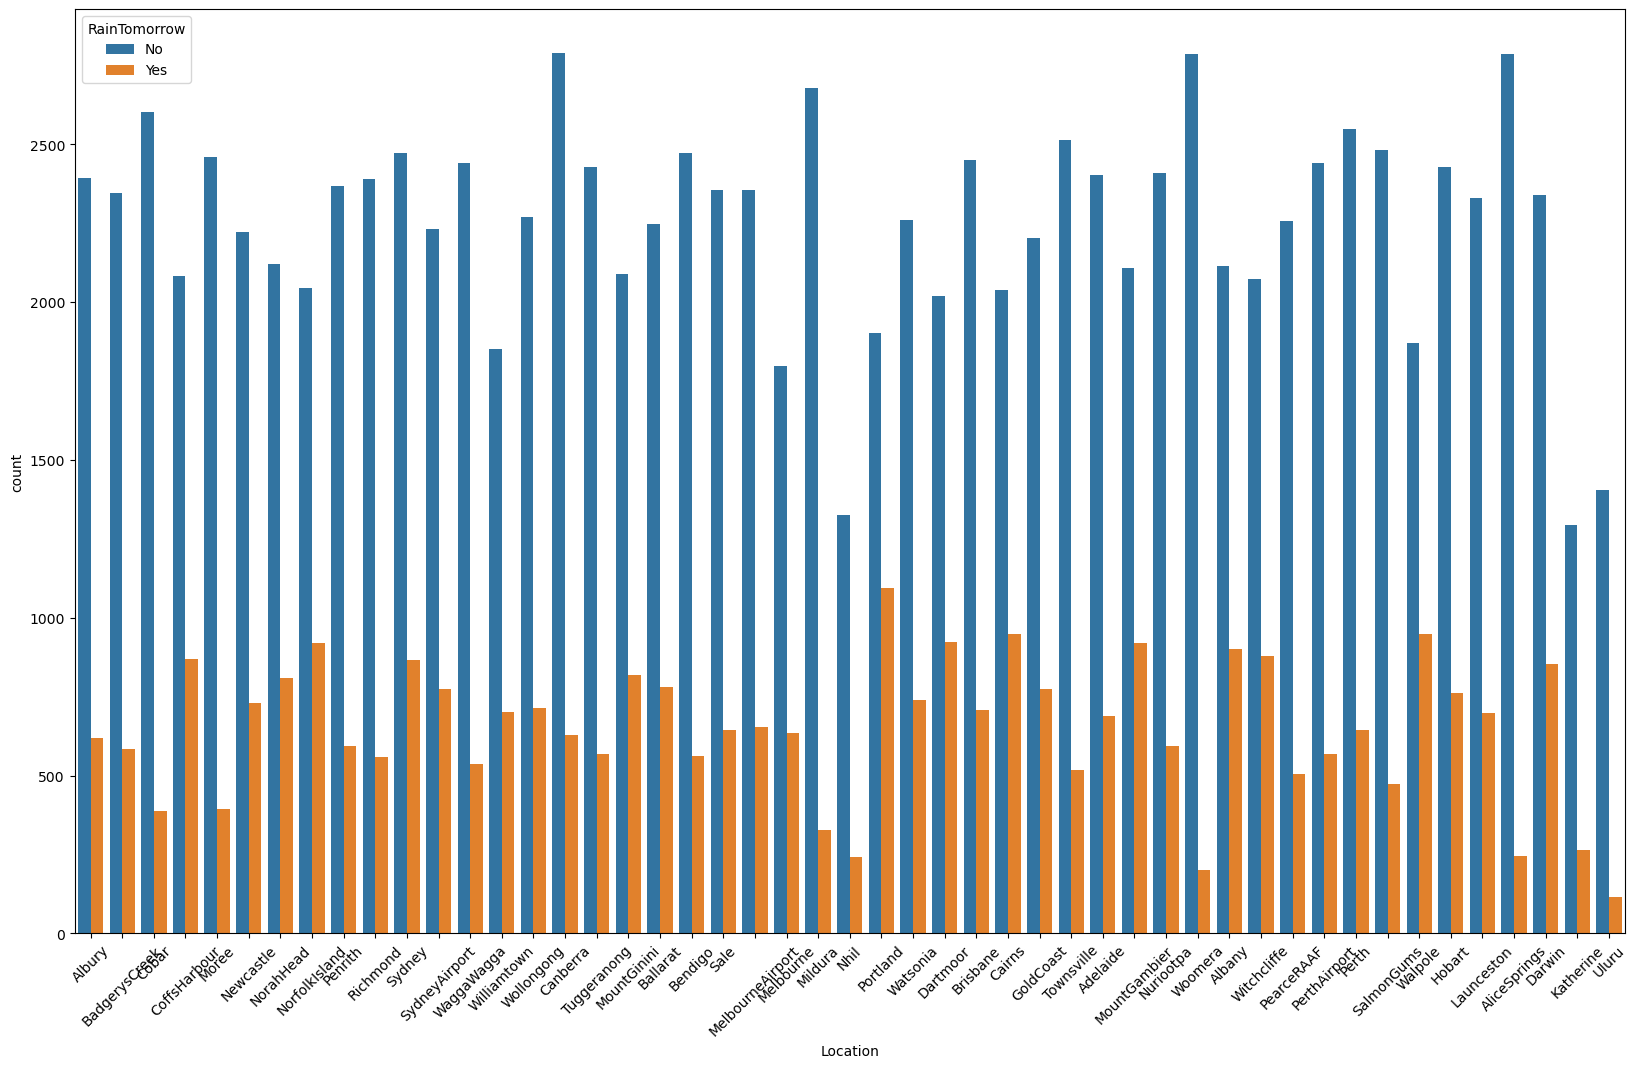

In [14]:
plt.figure(figsize=(20, 12))
sns.countplot(x="Location", hue="RainTomorrow", data=df)
plt.xticks(rotation=45)
plt.show()

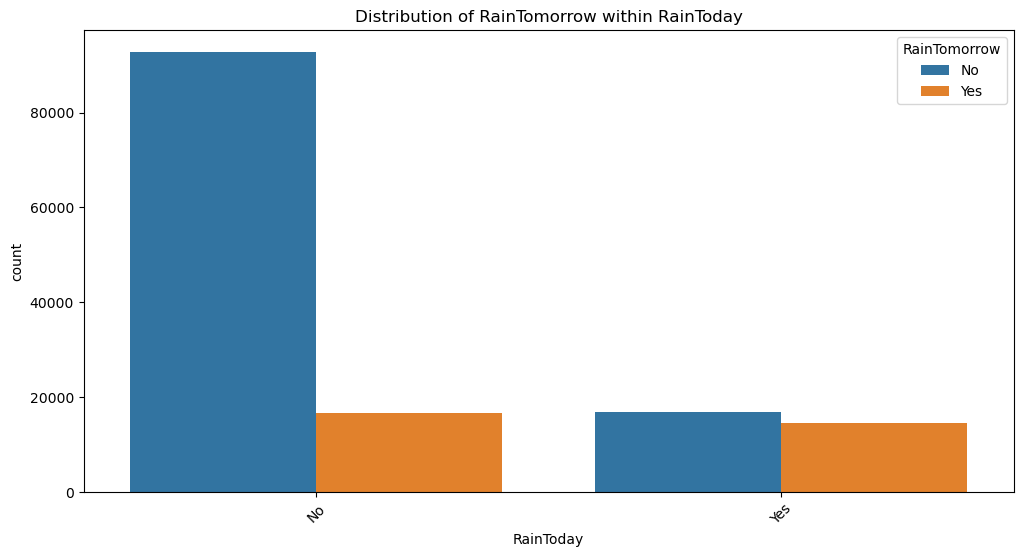

In [15]:
plt.figure(figsize=(12,6))
sns.countplot(x="RainToday", hue="RainTomorrow", data=df)
plt.xticks(rotation=45)
plt.title("Distribution of RainTomorrow within RainToday")
plt.show()

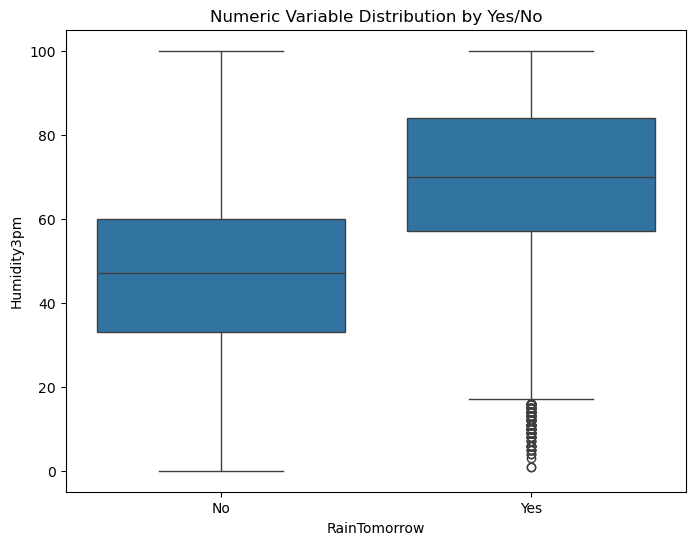

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(x="RainTomorrow", y="Humidity3pm", data=df)
plt.title("Numeric Variable Distribution by Yes/No")
plt.show()

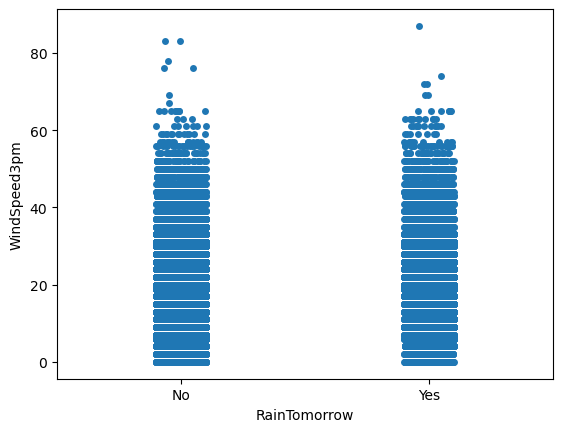

In [17]:
sns.stripplot(x="RainTomorrow", y="WindSpeed3pm", data=df, jitter=True)
plt.show()

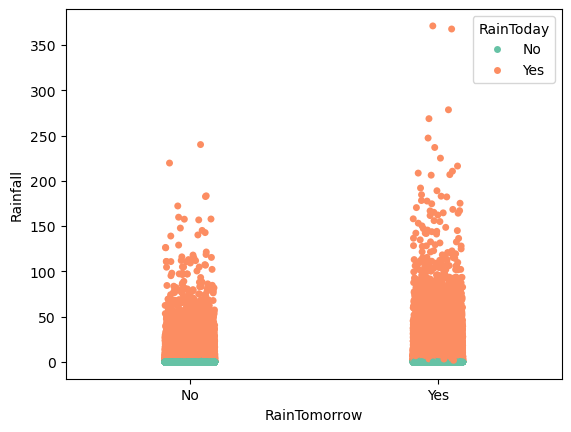

In [18]:
sns.stripplot(x="RainTomorrow", y="Rainfall", data=df, jitter=True,hue='RainToday', palette="Set2")
plt.show()


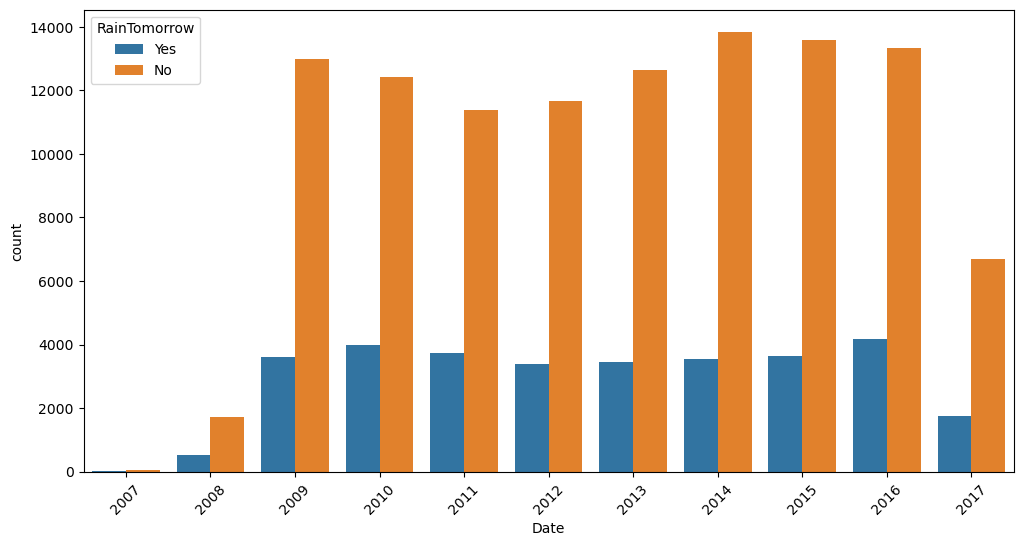

In [19]:
plt.figure(figsize=(12, 6))
sns.countplot(x=pd.to_datetime(df["Date"], errors="coerce").dt.year, hue='RainTomorrow',data=df)
plt.xticks(rotation=45)
plt.show()

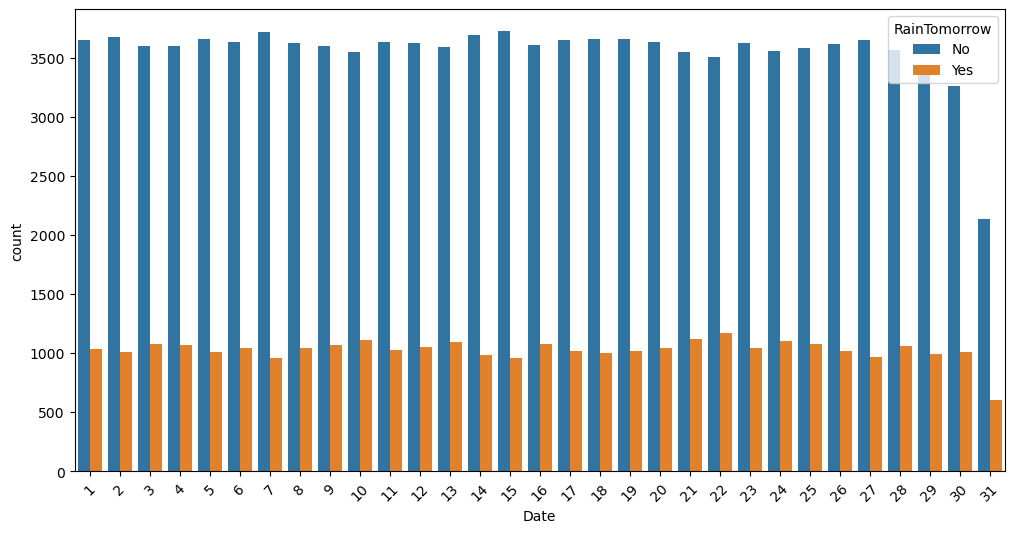

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(x=pd.to_datetime(df["Date"], errors="coerce").dt.day,hue='RainTomorrow',data=df)
plt.xticks(rotation=45)
plt.show()

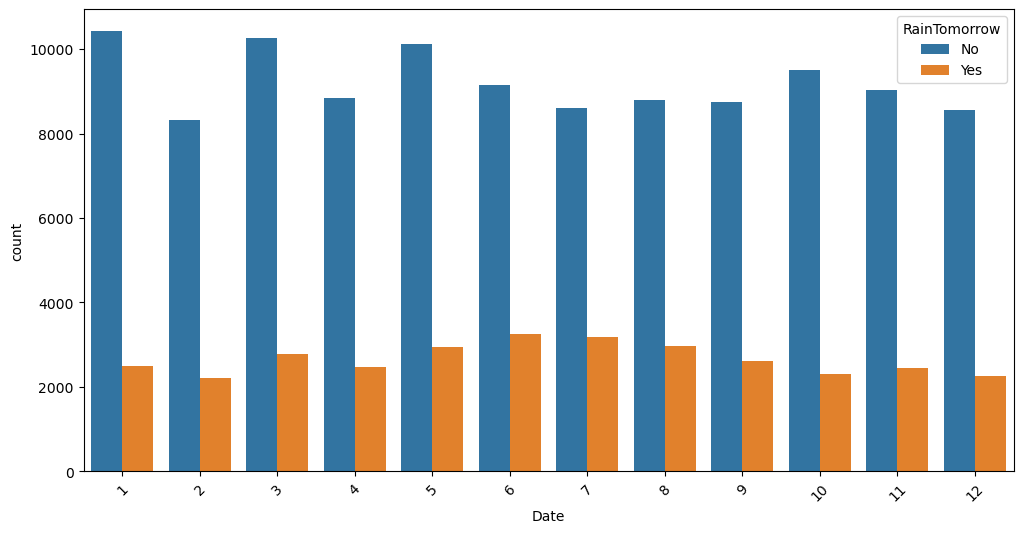

In [21]:
plt.figure(figsize=(12, 6))
sns.countplot(x=pd.to_datetime(df["Date"], errors="coerce").dt.month,hue='RainTomorrow',data=df)
plt.xticks(rotation=45)
plt.show()

*Adding new Features*

In [22]:
year=pd.to_datetime(df['Date']).dt.year

In [23]:
month=pd.to_datetime(df['Date']).dt.month

In [24]:
month.unique()

array([12,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int32)

In [25]:
Day=pd.to_datetime(df['Date']).dt.day

In [26]:
df.loc[:,'Month']=month;

In [27]:
df.loc[:,'Day']=Day

In [28]:
df.drop(labels='Date',axis=1,inplace=True)

In [29]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No,6,20
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,6,21
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,6,22
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,6,23


In [30]:
target_cols='RainTomorrow'

In [31]:
input_cols=df.columns.tolist()
input_cols.remove(target_cols)

In [32]:
numeric_cols=df.select_dtypes(include=np.number).columns.tolist()
cat_cols=df.select_dtypes(include='object').columns.tolist()

In [33]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes('object').columns.tolist()
cat_cols.remove(target_cols)

In [34]:
cat_cols

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

*Splitting Dataset --date time series*

In [35]:
train_df=df[year<2015].copy()
val_df=df[year==2015].copy()
test_df=df[year>2015].copy()
train_targets=train_df[target_cols]
val_targets=val_df[target_cols]
test_targets=test_df[target_cols]
train_df.drop(target_cols,axis=1,inplace=True)
val_df.drop(target_cols,axis=1,inplace=True)
test_df.drop(target_cols,axis=1,inplace=True)

In [36]:
train_df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,12,5


In [37]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 98988, dtype: object

*Imputing using SimpleImputer*

In [38]:
df[numeric_cols].isnull().sum()

MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustSpeed     9270
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
Month                0
Day                  0
dtype: int64

In [39]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean').fit(train_df[numeric_cols])

In [40]:
train_df[numeric_cols]=imputer.transform(train_df[numeric_cols])
val_df[numeric_cols]=imputer.transform(val_df[numeric_cols])
test_df[numeric_cols]=imputer.transform(test_df[numeric_cols])

In [41]:
train_df[numeric_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Month            0
Day              0
dtype: int64

*Scaling the numeric columns through MinMax Scalar*

In [42]:
from sklearn.preprocessing import MinMaxScaler

In [43]:
scaler=MinMaxScaler().fit(train_df[numeric_cols])

In [44]:
scaler.data_min_

array([ -8.5,  -4.1,   0. ,   0. ,   0. ,   6. ,   0. ,   0. ,   0. ,
         0. , 980.5, 979. ,   0. ,   0. ,  -5.9,  -5.1,   1. ,   1. ])

In [45]:
train_df[numeric_cols] = scaler.transform(train_df[numeric_cols])
val_df[numeric_cols] = scaler.transform(val_df[numeric_cols])
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])

*Encoding the categorical columns through OneHotEncoder*

In [46]:
from sklearn.preprocessing import OneHotEncoder

In [47]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(train_df[cat_cols])

In [48]:
encoded_cols = list(encoder.get_feature_names_out(cat_cols))

In [49]:
train_df.loc[:,encoded_cols] = encoder.transform(train_df[cat_cols])
val_df.loc[:,encoded_cols] = encoder.transform(val_df[cat_cols])
test_df.loc[:,encoded_cols] = encoder.transform(test_df[cat_cols])

In [50]:
train_df.drop(cat_cols,axis=1,inplace=True)
val_df.drop(cat_cols,axis=1,inplace=True)
test_df.drop(cat_cols,axis=1,inplace=True)

In [51]:
train_df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Month,Day,Location_Adelaide,Location_Albany,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,Location_CoffsHarbour,Location_Dartmoor,Location_Darwin,Location_GoldCoast,Location_Hobart,Location_Katherine,Location_Launceston,Location_Melbourne,Location_MelbourneAirport,Location_Mildura,Location_Moree,Location_MountGambier,Location_MountGinini,Location_Newcastle,Location_Nhil,Location_NorahHead,Location_NorfolkIsland,Location_Nuriootpa,Location_PearceRAAF,Location_Penrith,Location_Perth,Location_PerthAirport,Location_Portland,Location_Richmond,Location_Sale,Location_SalmonGums,Location_Sydney,Location_SydneyAirport,Location_Townsville,Location_Tuggeranong,Location_Uluru,Location_WaggaWagga,Location_Walpole,Location_Watsonia,Location_Williamtown,Location_Witchcliffe,Location_Wollongong,Location_Woomera,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes,RainToday_nan
0,0.516509,0.517241,0.001617,0.064161,0.531618,0.294574,0.229885,0.275862,0.71,0.22,0.449587,0.463696,0.888889,0.490495,0.494577,0.525391,1.0,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.375000,0.559387,0.000000,0.064161,0.531618,0.294574,0.045977,0.252874,0.44,0.25,0.497521,0.475248,0.478672,0.490495,0.501085,0.574219,1.0,0.033333,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,0.504717,0.570881,0.000000,0.064161,0.531618,0.310078,0.218391,0.298851,0.38,0.30,0.447934,0.490099,0.478672,0.222222,0.583514,0.552734,1.0,0.066667,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.417453,0.614943,0.000000,0.064161,0.531618,0.139535,0.126437,0.103448,0.45,0.16,0.613223,0.557756,0.478672,0.490495,0.520607,0.617188,1.0,0.100000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

*Training the Base model*

In [52]:
train_targets

0         No
1         No
2         No
3         No
4         No
          ..
144548    No
144549    No
144550    No
144551    No
144552    No
Name: RainTomorrow, Length: 98988, dtype: object

In [53]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42).fit(train_df,train_targets)

*Evaluation of the base model*

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix
train_preds = model.predict(train_df)

In [55]:
pd.Series(train_preds).value_counts()

No     76705
Yes    22283
Name: count, dtype: int64

In [56]:
train_proba=model.predict_proba(train_df)

In [57]:
train_preds

array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [58]:
train_proba

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [59]:
accuracy_score(train_targets,train_preds)

1.0

In [60]:
model.score(train_df,train_targets)

1.0

In [61]:
model.score(val_df,val_targets)

0.7907260170622715

DECISION TREE SCORE : 79% Val, 100% Train

In [62]:
model.classes_

array(['No', 'Yes'], dtype=object)

*Visualizing our model tree*

In [63]:
from sklearn.tree import plot_tree, export_text

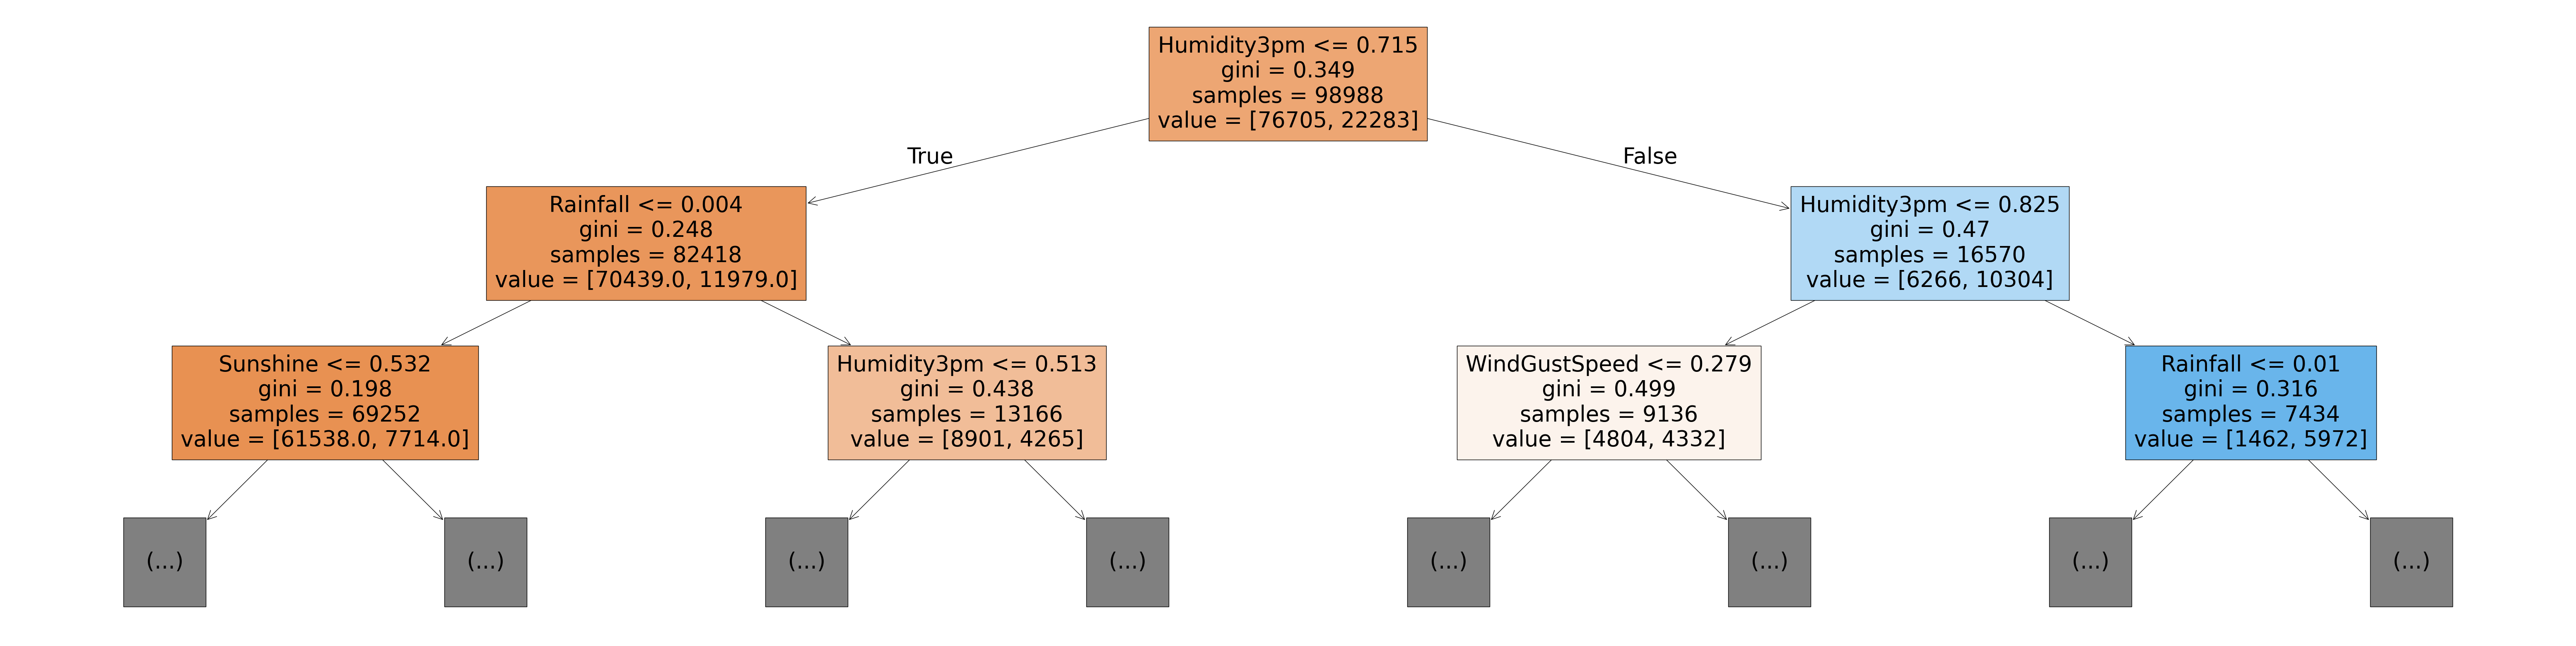

In [64]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=train_df.columns, max_depth=2, filled=True);

In [65]:
model.tree_.max_depth

48

In [66]:
model.tree_.n_leaves

np.int64(10806)

In [67]:
tree_text = export_text(model, max_depth=10, feature_names=list(train_df.columns))
print(tree_text[:2000])

|--- Humidity3pm <= 0.72
|   |--- Rainfall <= 0.00
|   |   |--- Sunshine <= 0.53
|   |   |   |--- Pressure3pm <= 0.57
|   |   |   |   |--- WindGustSpeed <= 0.36
|   |   |   |   |   |--- Humidity3pm <= 0.28
|   |   |   |   |   |   |--- WindDir9am_NE <= 0.50
|   |   |   |   |   |   |   |--- Location_Watsonia <= 0.50
|   |   |   |   |   |   |   |   |--- Cloud9am <= 0.83
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm <= 0.07
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm <= 0.44
|   |   |   |   |   |   |   |   |   |   |   |--- class: Yes
|   |   |   |   |   |   |   |   |   |   |--- Pressure3pm >  0.44
|   |   |   |   |   |   |   |   |   |   |   |--- class: No
|   |   |   |   |   |   |   |   |   |--- WindSpeed3pm >  0.07
|   |   |   |   |   |   |   |   |   |   |--- MinTemp <= 0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |   |   |--- MinTemp >  0.32
|   |   |   |   |   |   |   |   |   |   |   |--- truncated

In [68]:
model.feature_importances_

array([3.31883476e-02, 2.79444227e-02, 5.74764557e-02, 2.08386610e-02,
       4.96176059e-02, 5.36480862e-02, 2.69164104e-02, 2.83321865e-02,
       3.34270041e-02, 2.58730659e-01, 3.18785855e-02, 5.94510275e-02,
       1.22902269e-02, 1.67448577e-02, 2.94312415e-02, 2.91642294e-02,
       1.99410915e-02, 3.26904039e-02, 1.75987853e-03, 1.79538304e-03,
       1.47069856e-03, 7.35252801e-04, 1.32122658e-03, 9.12269605e-04,
       4.65277569e-04, 1.40142256e-03, 1.07511531e-03, 1.53020684e-03,
       1.00252670e-03, 2.10279203e-03, 1.36051991e-03, 1.94796490e-04,
       1.15494945e-03, 1.19711952e-03, 4.89581030e-04, 6.41369845e-04,
       1.24823357e-03, 8.71623939e-04, 8.41843677e-04, 6.52519803e-04,
       1.30775463e-03, 1.85271570e-03, 2.09380746e-04, 4.96333989e-04,
       1.41187085e-03, 1.38179995e-03, 1.63550156e-03, 6.87799657e-04,
       8.35995318e-04, 1.62265782e-03, 1.04415997e-03, 1.72285942e-03,
       7.51988294e-04, 1.79387131e-03, 1.11050354e-03, 1.07052080e-03,
      

In [69]:
importance_df = pd.DataFrame({
    'feature': train_df.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

In [70]:
importance_df.head(10)

,feature,importance
9,Humidity3pm,0.258731
11,Pressure3pm,0.059451
2,Rainfall,0.057476
5,WindGustSpeed,0.053648
4,Sunshine,0.049618
8,Humidity9am,0.033427
0,MinTemp,0.033188
17,Day,0.032690
10,Pressure9am,0.031879
14,Temp9am,0.029431


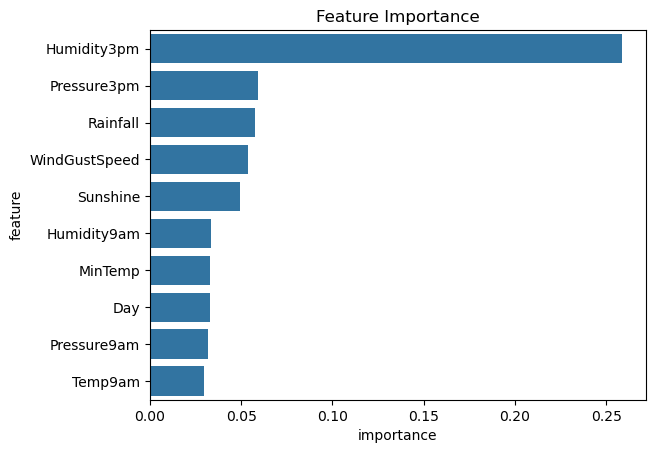

In [71]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

*Tuning of Hyperparameter of our base model*

In [72]:
def try_model(**a):
    model=DecisionTreeClassifier(**a,random_state=42).fit(train_df, train_targets)
    train_score = 1-model.score(train_df,train_targets)
    val_score = 1-model.score(val_df,val_targets)
    return {'Training Error': train_score, 'Validation Error': val_score}

In [73]:
try_model(max_depth=48)

{'Training Error': 0.0, 'Validation Error': 0.20927398293772848}

In [74]:
try_model(max_depth=4)

{'Training Error': 0.1657069543783085, 'Validation Error': 0.1643549416748883}

In [75]:
try_model(max_leaf_nodes=10000)

{'Training Error': 0.004172222895704514,
 'Validation Error': 0.2031803145493587}

In [76]:
try_model(max_leaf_nodes=40)

{'Training Error': 0.15877682143290095,
 'Validation Error': 0.15918983227903194}

In [77]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
train_inputs_full = pd.concat([train_df, val_df], axis=0).copy()
train_targets_full = pd.concat([train_targets, val_targets], axis=0).copy()
param_dist = {
    "max_depth": np.arange(2,12),
    "max_leaf_nodes": np.arange(5, 101)
}
model = DecisionTreeClassifier(random_state=42)
random_search = RandomizedSearchCV(model, param_dist, n_iter=20, cv=5, scoring="accuracy", random_state=42, n_jobs=-1)
random_search.fit(train_inputs_full,train_targets_full)

print("Best Params:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)


Best Params: {'max_leaf_nodes': np.int64(67), 'max_depth': np.int64(5)}
Best CV Score: 0.8359046405727704


In [78]:
try_model(max_depth=5,max_leaf_nodes=67)

{'Training Error': 0.16067604154038873,
 'Validation Error': 0.15907376240496784}

TUNNED DESION TREE SCORE : 84.1% Val, 84% Train

*Trying a better model : Random Forest*

In [79]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
model = RandomForestClassifier(n_jobs=-1, random_state=42).fit(train_df,train_targets)

In [81]:
model.score(train_df,train_targets)

0.9999696932961571

In [82]:
model.score(val_df,val_targets)

0.8554349718530555

BASE RANDOM FORREST SCORE 85.5% Val 99.99% Train

In [83]:
param_dist_rf =param_dist_rf = {
    "n_estimators": [100, 200],
    "max_depth": [8, 12, 16, 20],
    "max_features": ["sqrt", "log2"],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_samples": [0.6, 0.75, 0.9],
    "bootstrap": [True],
}

model_rf = RandomForestClassifier(random_state=42)
search = RandomizedSearchCV(
    model_rf, param_dist_rf,
    n_iter=6,
    cv=3,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1
)
search.fit(train_inputs_full,train_targets_full)

print("Best Params:",search.best_params_)
print("Best CV Score:",search.best_score_)

Best Params: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_samples': 0.9, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': True}
Best CV Score: 0.8390882673511854


In [84]:
best_rf = search.best_estimator_
print(best_rf.score(train_df,train_targets))
print(best_rf.score(val_df,val_targets))

0.8874510041621206
0.8847426150542627


TUNNED RANDOM FORREST SCORE : 88.47% VAL, 88.7% TRAIN 

*Using Logistics Regression*

In [89]:
from sklearn.linear_model import LogisticRegression


In [86]:
model=LogisticRegression(solver='liblinear').fit(train_df,train_targets)

In [87]:
train_predict=model.predict(train_df)
train_predict_proba=model.predict_proba(train_df)

In [90]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(train_targets,train_predict)

0.8501333494969087

In [95]:
val_predict=model.predict(val_df)
accuracy_score(val_targets,val_predict)


0.852591259938483

In [99]:
c_m=confusion_matrix(val_targets,val_predict, normalize='true')

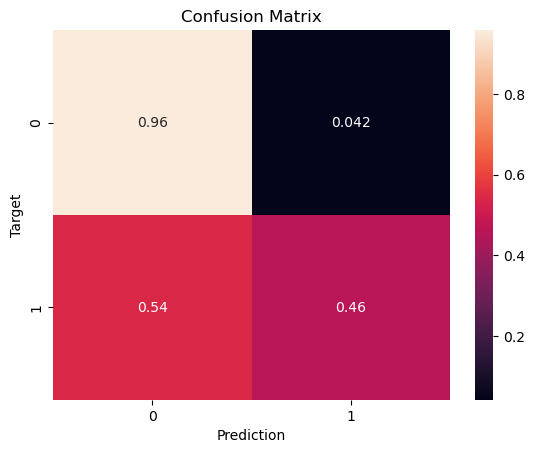

In [102]:
sns.heatmap(c_m,annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix');
plt.show()

LOGISTIC REGRESSION ACCURACY SCORE : 85.25% VAL, 85.01% TRAIN 

TUNNED RANDOM FORREST IS OUR BEST MODEL

In [103]:
print(f" Accuracy of our best model on Test data is :{best_rf.score(test_df,test_targets)}")


 Accuracy of our best model on Test data is :0.8387618387618387


In [104]:
importance_df_rf = pd.DataFrame({
    'feature': train_df.columns,
    'importance': best_rf.feature_importances_
}).sort_values('importance', ascending=False)

In [105]:
importance_df_rf.head(10)

,feature,importance
9,Humidity3pm,0.180849
2,Rainfall,0.073790
4,Sunshine,0.066346
13,Cloud3pm,0.055021
8,Humidity9am,0.052115
11,Pressure3pm,0.051380
5,WindGustSpeed,0.047723
118,RainToday_No,0.045838
10,Pressure9am,0.043963
15,Temp3pm,0.035241


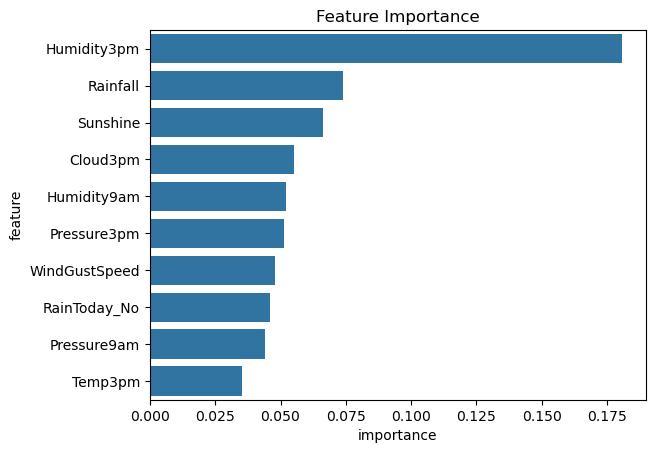

In [106]:
plt.title('Feature Importance')
sns.barplot(data=importance_df_rf.head(10), x='importance', y='feature');

In [107]:
import joblib
joblib.dump(best_rf, "Random_Forest.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(encoder, "encoder.pkl")
joblib.dump(imputer,"imputer.pkl")

['imputer.pkl']

In [108]:
model = joblib.load("Random_Forest.pkl")
scaler = joblib.load("scaler.pkl")
encoder = joblib.load("encoder.pkl")
imputer=joblib.load("imputer.pkl")

In [109]:
new_input={
    "Date": 2009_07_03,
    "Location": "Albury",
    "MinTemp": 7.6,
    "MaxTemp": 12,
    "Rainfall": 7.8,
    "Evaporation":np.nan ,
    "Sunshine":np.nan ,
    "WindGustDir": "W",
    "WindGustSpeed": 61,
    "WindDir9am": "W",
    "WindDir3pm": "WSW",
    "WindSpeed9am": 17,
    "WindSpeed3pm": 22,
    "Humidity9am": 82,
    "Humidity3pm": 62,
    "Pressure9am": 1008.6,
    "Pressure3pm": 1009.6,
    "Cloud9am": 8,
    "Cloud3pm": 1,
    "Temp9am": 7.8,
    "Temp3pm": 11.7,
    "RainToday": "Yes",
    "RainTomorrow": "No"
}

In [110]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    month=pd.to_datetime(input_df['Date']).dt.month
    Day=pd.to_datetime(input_df['Date']).dt.day
    input_df.loc[:,'Month']=month;
    input_df.loc[:,'Day']=Day
    input_df.drop(labels='Date',axis=1,inplace=True)
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df.loc[:,encoded_cols] = encoder.transform(input_df[cat_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

In [111]:
numeric_cols

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Month',
 'Day']

In [112]:
predict_input(new_input)

('No', np.float64(0.5666482820178136))